In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
# Load Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_labels = iris.target

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
bc_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
bc_labels = breast_cancer.target

scaler = StandardScaler()
iris_data_scaled = iris_data
bc_data_scaled = bc_data



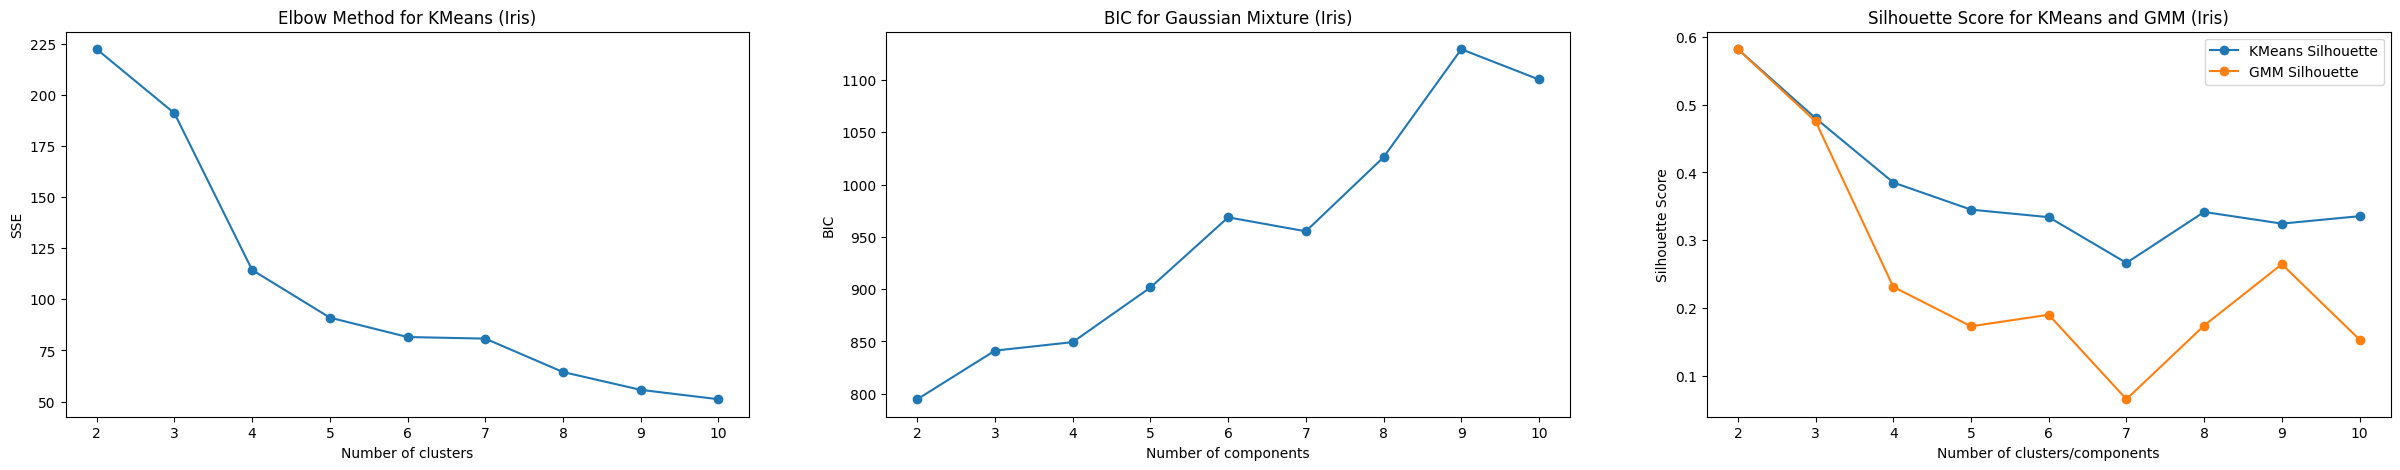

Best number of clusters for KMeans based on Silhouette Score: 2
Best number of components for GMM based on Silhouette Score: 2


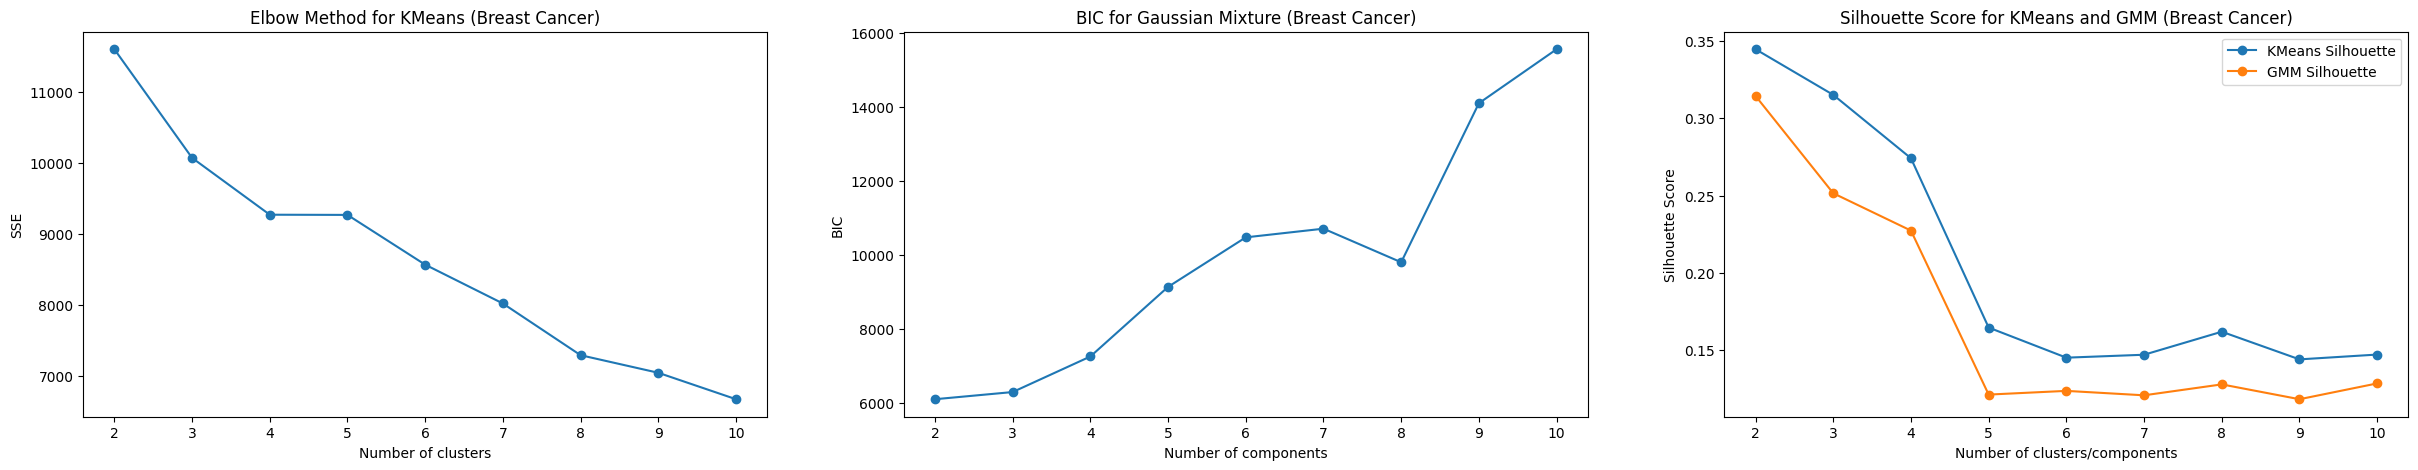

Best number of clusters for KMeans based on Silhouette Score: 2
Best number of components for GMM based on Silhouette Score: 2


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def choose_best_k(data):
    k_range = range(2, 11)  # Starting from 2 because silhouette score is not defined for k=1
    best_k_kmeans = 2
    best_silhouette_kmeans = -1
    best_k_gmm = 2
    best_silhouette_gmm = -1

    for k in k_range:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        silhouette_kmeans = silhouette_score(data, kmeans.labels_)
        
        if silhouette_kmeans > best_silhouette_kmeans:
            best_silhouette_kmeans = silhouette_kmeans
            best_k_kmeans = k
        
        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        silhouette_gmm = silhouette_score(data, gmm.predict(data))
        
        if silhouette_gmm > best_silhouette_gmm:
            best_silhouette_gmm = silhouette_gmm
            best_k_gmm = k

    return best_k_kmeans, best_k_gmm

def plot_elbow_method(data, dataset_name):
    sse = []
    bic = []
    kmeans_silhouette = []
    gmm_silhouette = []

    k_range = range(2, 11)  # Starting from 2 because silhouette score is not defined for k=1

    for k in k_range:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        kmeans_silhouette.append(silhouette_score(data, kmeans.labels_))
        
        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bic.append(gmm.bic(data))
        gmm_silhouette.append(silhouette_score(data, gmm.predict(data)))
    
    fig, ax = plt.subplots(1, 3, figsize=(30, 5))
    
    # KMeans Elbow
    ax[0].plot(k_range, sse, marker='o')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('SSE')
    ax[0].set_title(f'Elbow Method for KMeans ({dataset_name})')
    
    # GMM BIC
    ax[1].plot(k_range, bic, marker='o')
    ax[1].set_xlabel('Number of components')
    ax[1].set_ylabel('BIC')
    ax[1].set_title(f'BIC for Gaussian Mixture ({dataset_name})')

    # Silhouette Scores
    ax[2].plot(k_range, kmeans_silhouette, marker='o', label='KMeans Silhouette')
    ax[2].plot(k_range, gmm_silhouette, marker='o', label='GMM Silhouette')
    ax[2].set_xlabel('Number of clusters/components')
    ax[2].set_ylabel('Silhouette Score')
    ax[2].set_title(f'Silhouette Score for KMeans and GMM ({dataset_name})')
    ax[2].legend()

    plt.show()

    best_k_kmeans, best_k_gmm = choose_best_k(data)
    print(f"Best number of clusters for KMeans based on Silhouette Score: {best_k_kmeans}")
    print(f"Best number of components for GMM based on Silhouette Score: {best_k_gmm}")

# Example usage
# Assume iris_data_scaled and bc_data_scaled are your scaled datasets
plot_elbow_method(iris_data_scaled, 'Iris')
plot_elbow_method(bc_data_scaled, 'Breast Cancer')


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from mpl_toolkits.mplot3d import Axes3D

# Load datasets
iris = datasets.load_iris()
breast_cancer = datasets.load_breast_cancer()

# Prepare data
iris_data = iris.data
breast_cancer_data = breast_cancer.data

# Standardize the data
scaler = StandardScaler()
iris_data = scaler.fit_transform(iris_data)
breast_cancer_data = scaler.fit_transform(breast_cancer_data)

# K-Means on Iris with 2 clusters
kmeans_iris = KMeans(n_clusters=2, random_state=42)
kmeans_iris_labels = kmeans_iris.fit_predict(iris_data)
kmeans_iris_score = silhouette_score(iris_data, kmeans_iris_labels)

# Gaussian Mixture on Iris with 2 components
gm_iris = GaussianMixture(n_components=2, random_state=42)
gm_iris_labels = gm_iris.fit_predict(iris_data)
gm_iris_score = silhouette_score(iris_data, gm_iris_labels)

# K-Means on Breast Cancer with 2 clusters
kmeans_bc = KMeans(n_clusters=2, random_state=42)
kmeans_bc_labels = kmeans_bc.fit_predict(breast_cancer_data)
kmeans_bc_score = silhouette_score(breast_cancer_data, kmeans_bc_labels)

# Gaussian Mixture on Breast Cancer with 2 components
gm_bc = GaussianMixture(n_components=2, random_state=42)
gm_bc_labels = gm_bc.fit_predict(breast_cancer_data)
gm_bc_score = silhouette_score(breast_cancer_data, gm_bc_labels)



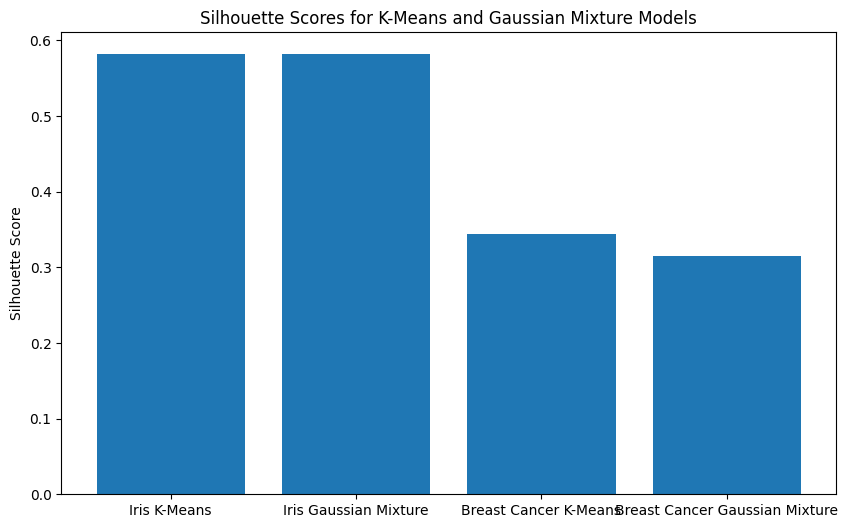

In [9]:
# Scores Visualization
scores = {
    'Iris K-Means': kmeans_iris_score,
    'Iris Gaussian Mixture': gm_iris_score,
    'Breast Cancer K-Means': kmeans_bc_score,
    'Breast Cancer Gaussian Mixture': gm_bc_score
}

plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values())
plt.title('Silhouette Scores for K-Means and Gaussian Mixture Models')
plt.ylabel('Silhouette Score')
plt.show()


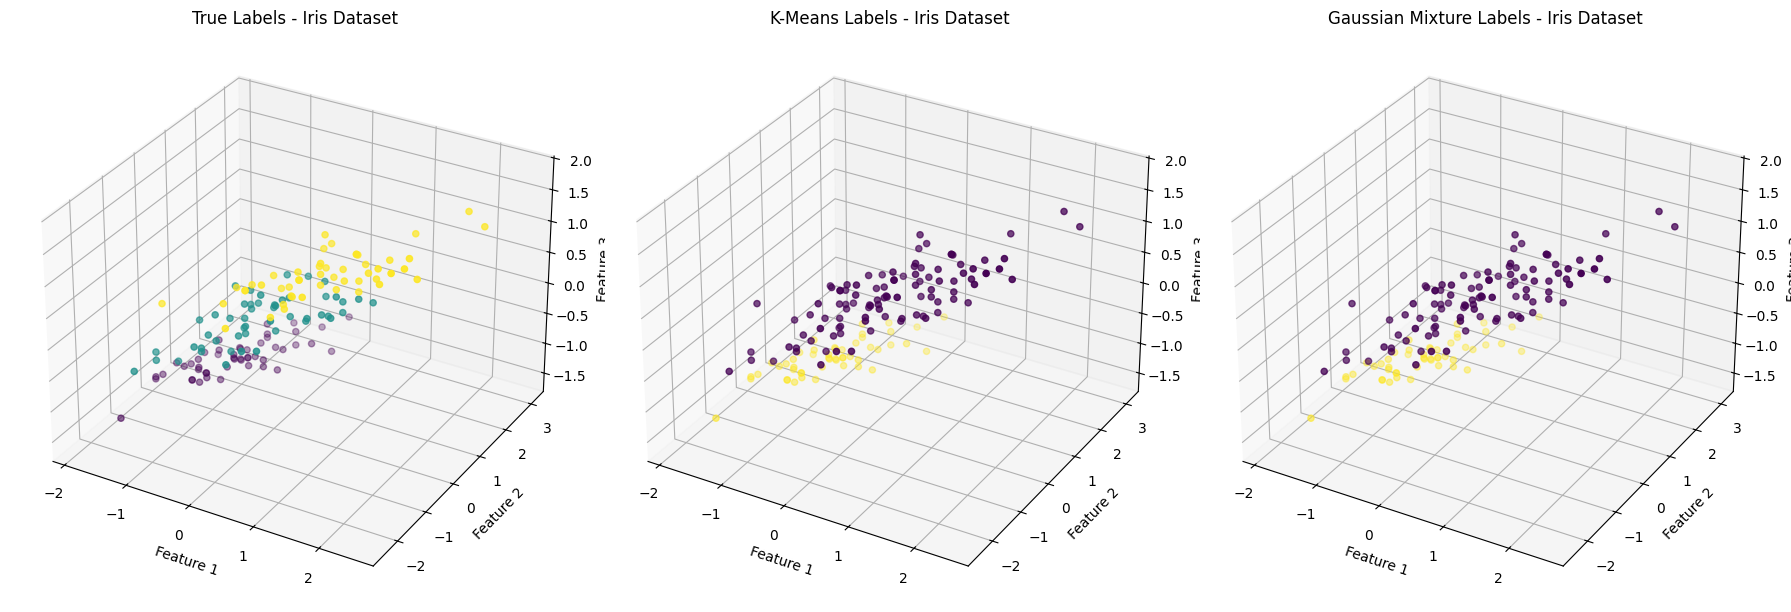

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_iris_clusters(ax, data, labels, title):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', marker='o')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

# Create a figure with 3 subplots
fig = plt.figure(figsize=(18, 6))

# True labels
ax1 = fig.add_subplot(131, projection='3d')
plot_iris_clusters(ax1, iris_data, iris.target, 'True Labels - Iris Dataset')

# K-Means labels
ax2 = fig.add_subplot(132, projection='3d')
plot_iris_clusters(ax2, iris_data, kmeans_iris_labels, 'K-Means Labels - Iris Dataset')

# Gaussian Mixture labels
ax3 = fig.add_subplot(133, projection='3d')
plot_iris_clusters(ax3, iris_data, gm_iris_labels, 'Gaussian Mixture Labels - Iris Dataset')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

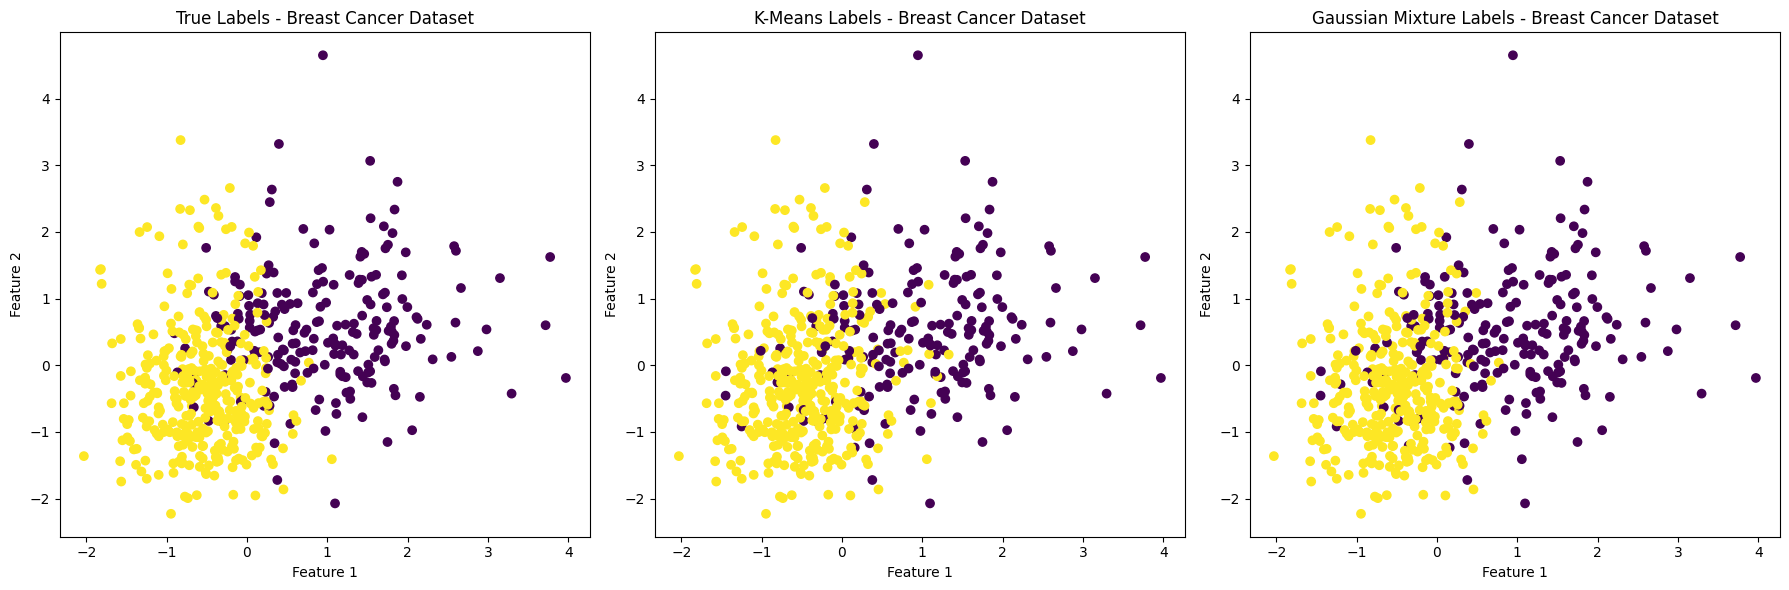

In [11]:
import matplotlib.pyplot as plt

def plot_bc_clusters(ax, data, labels, title):
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# True labels
plot_bc_clusters(axes[0], breast_cancer_data, breast_cancer.target, 'True Labels - Breast Cancer Dataset')

# K-Means labels
plot_bc_clusters(axes[1], breast_cancer_data, kmeans_bc_labels, 'K-Means Labels - Breast Cancer Dataset')

# Gaussian Mixture labels
plot_bc_clusters(axes[2], breast_cancer_data, gm_bc_labels, 'Gaussian Mixture Labels - Breast Cancer Dataset')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
